In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = pd.read_csv('heart_attack.csv')
d.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
d.shape

(299, 13)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
d.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
d.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### EDA

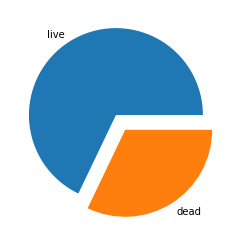

In [15]:
ll = len(d['DEATH_EVENT'][d.DEATH_EVENT == 0])
ld = len(d['DEATH_EVENT'][d.DEATH_EVENT == 1])

a = np.array([ll,ld])
l = ['live','dead']

plt.pie(a,labels=l,explode=(0.0,0.2));

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


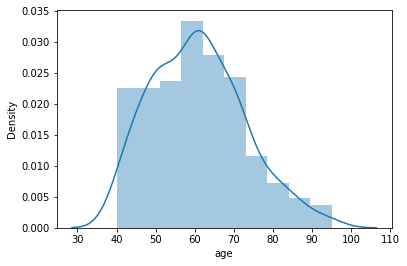

In [12]:
sns.distplot(d['age']);

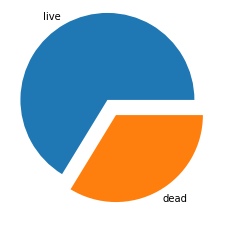

In [21]:
lf = len(d['DEATH_EVENT'][d.age>=50][d.DEATH_EVENT==0])
df = len(d['DEATH_EVENT'][d.age>=50][d.DEATH_EVENT==1])

a1 = np.array([lf,df])
l1 = ['live','dead']

plt.pie(a1,labels=l1,explode=[0.2,0.0]);

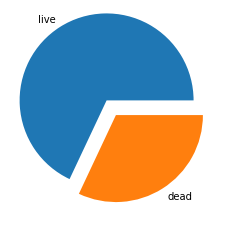

In [24]:
lf = len(d['DEATH_EVENT'][d.diabetes==1][d.DEATH_EVENT==0])
df = len(d['DEATH_EVENT'][d.diabetes==1][d.DEATH_EVENT==1])

a1 = np.array([lf,df])
l1 = ['live','dead']

plt.pie(a1,labels=l1,explode=[0.2,0.0]);

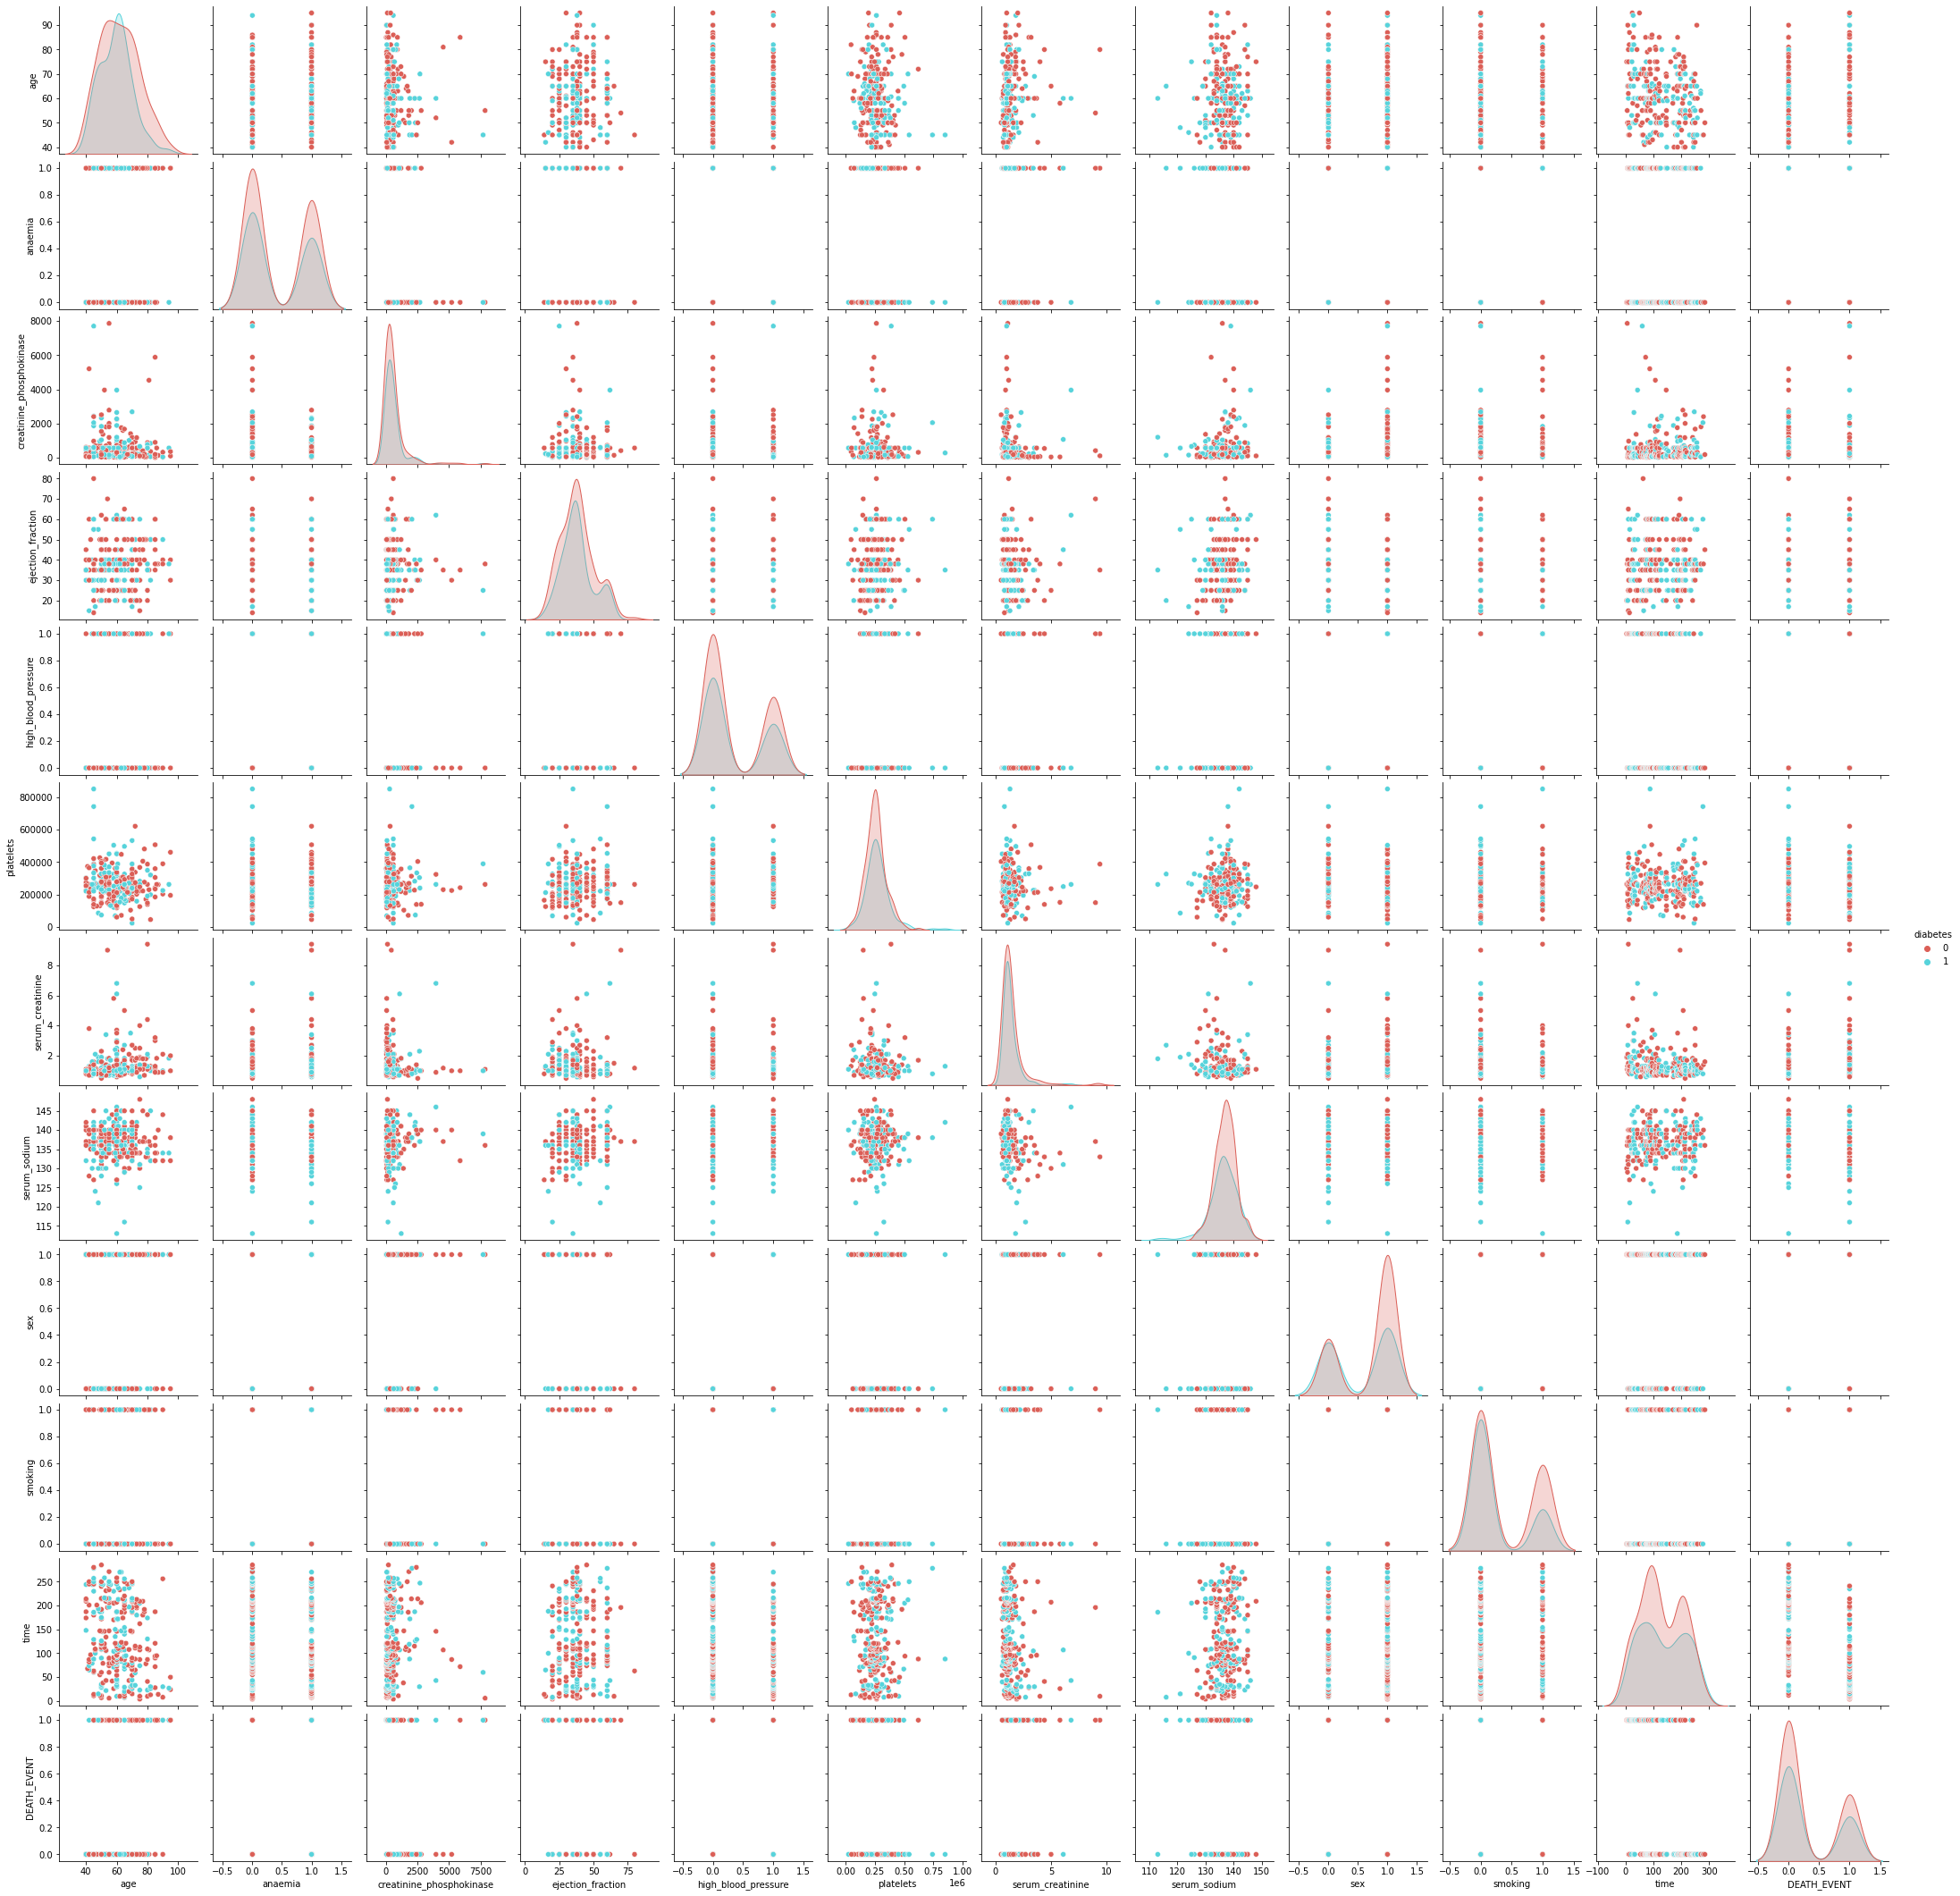

In [29]:
sns.pairplot(d,hue='diabetes',palette='hls');

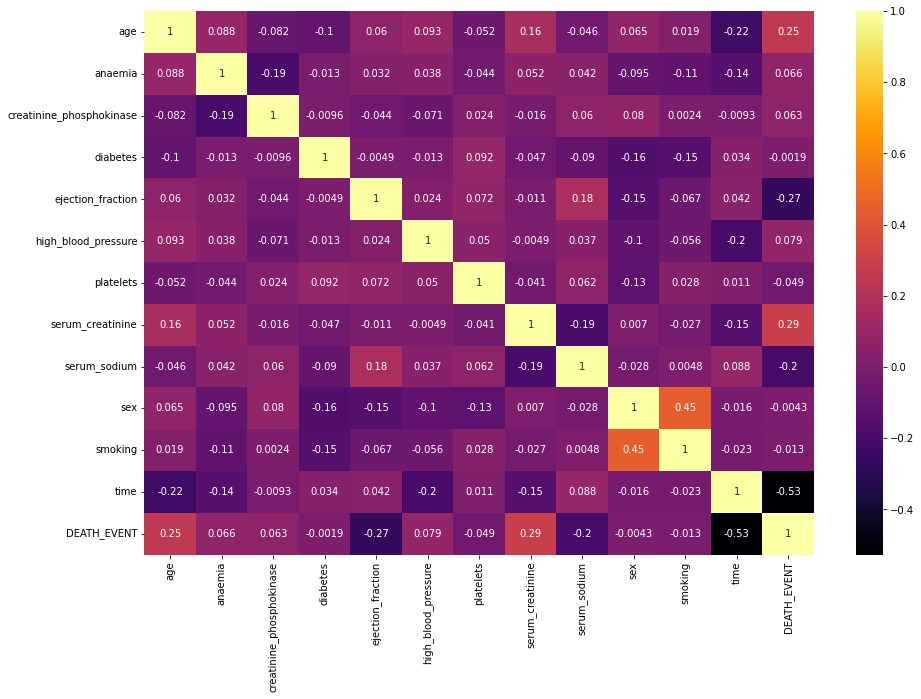

In [31]:
corr = d.corr()

plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='inferno');

In [32]:
d.corr().style.background_gradient(cmap='magma')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


### Dataset

In [33]:
from sklearn.model_selection import train_test_split

x = d.drop('DEATH_EVENT',axis=1)
y = d['DEATH_EVENT']

a,d,s,f = train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
print(a.shape)
print(s.shape)
print(d.shape)
print(f.shape)

(239, 12)
(239,)
(60, 12)
(60,)


### Model

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def em(f,g):
    print('accuracy score : ',accuracy_score(f,g))
    print('precision score : ',precision_score(f,g))
    print('recall score : ',recall_score(f,g))
    print('confusion matrix : \n',confusion_matrix(f,g))

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(a,s)
g=lr.predict(d)
em(f,g)

accuracy score :  0.7333333333333333
precision score :  0.8181818181818182
recall score :  0.391304347826087
confusion matrix : 
 [[35  2]
 [14  9]]


#### Standardized Logistic Regression

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(StandardScaler(), LogisticRegression())
lr.fit(a,s) 
g = lr.predict(d)
em(f,g)

accuracy score :  0.7833333333333333
precision score :  0.9166666666666666
recall score :  0.4782608695652174
confusion matrix : 
 [[36  1]
 [12 11]]


#### Support Vector Machine

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pg = {'C':[0.1,1,10,100,1000],
     'gamma':[1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']}
gr = GridSearchCV(SVC(), pg, refit=True, verbose=3)
gr.fit(a,s)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
gr.best_estimator_

SVC(C=100, gamma=0.0001)

In [49]:
svc = SVC(C=100,gamma=0.0001)
svc.fit(a,s)
g = svc.predict(d)
em(f,g)

accuracy score :  0.6166666666666667
precision score :  0.5
recall score :  0.08695652173913043
confusion matrix : 
 [[35  2]
 [21  2]]


#### Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def rs(p,r=20,clf=DecisionTreeClassifier(random_state=9),a=a,s=s):
    rclf = RandomizedSearchCV(clf,p,n_iter=r,n_jobs=-1,random_state=2)
    rclf.fit(a,s)
    bm = rclf.best_estimator_
    bs = rclf.best_score_
    print('Training score : {:.2f}'.format(bs))
    g = bm.predict(d)
    a = accuracy_score(f,g)
    print('Test score : {:.2f}'.format(a))
    return bm
rs(p = {'criterion':['entropy', 'gini'],
        'splitter':['random', 'best'],
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth':[None, 2,4,6,8],
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training score : 0.85
Test score : 0.80


C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0005, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, random_state=9)

In [55]:
dt = DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0005, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, random_state=9)
dt.fit(a,s)
g = dt.predict(d)
em(f,g)

accuracy score :  0.8
precision score :  0.8235294117647058
recall score :  0.6086956521739131
confusion matrix : 
 [[34  3]
 [ 9 14]]


C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


#### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rs(p={'min_samples_leaf':[1,2,4,6,8,10,20,30],
    'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'max_depth':[None,2,4,6,8,10,20]}, clf=RandomForestClassifier(random_state=2))

Training score : 0.85
Test score : 0.82


RandomForestClassifier(max_depth=2, max_features=0.8, min_impurity_decrease=0.1,
                       random_state=2)

In [60]:
rf = RandomForestClassifier(max_depth=2, max_features=0.8, min_impurity_decrease=0.1,
                       random_state=2)
rf.fit(a,s)
g = rf.predict(d)
em(f,g)

accuracy score :  0.8166666666666667
precision score :  0.9285714285714286
recall score :  0.5652173913043478
confusion matrix : 
 [[36  1]
 [10 13]]


#### XG Boost

In [61]:
from xgboost import XGBClassifier
xg = XGBClassifier(colsample_bytree = 1.0,
                  learning_rate=0.1,
                  max_depth=4,
                  n_estimators=400,
                  subsample=1.0)

es = [(d,f)]
xg.fit(a,s,
      early_stopping_rounds=10,
      eval_metric='logloss',
      eval_set=es,
      verbose=True)

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.64690
[1]	validation_0-logloss:0.60789
[2]	validation_0-logloss:0.57185
[3]	validation_0-logloss:0.54400
[4]	validation_0-logloss:0.52026
[5]	validation_0-logloss:0.50044
[6]	validation_0-logloss:0.48670
[7]	validation_0-logloss:0.46671
[8]	validation_0-logloss:0.45347
[9]	validation_0-logloss:0.44399
[10]	validation_0-logloss:0.43695
[11]	validation_0-logloss:0.42949
[12]	validation_0-logloss:0.42443
[13]	validation_0-logloss:0.41816
[14]	validation_0-logloss:0.41175
[15]	validation_0-logloss:0.40732
[16]	validation_0-logloss:0.40487
[17]	validation_0-logloss:0.40202
[18]	validation_0-logloss:0.39875
[19]	validation_0-logloss:0.39830
[20]	validation_0-logloss:0.39800
[21]	validation_0-logloss:0.39569
[22]	validation_0-logloss:0.39455
[23]	validation_0-logloss:0.39473
[24]	validation_0-logloss:0.39311
[25]	validation_0-logloss:0.39218
[26]	validation_0-logloss:0.39112
[27]	validation_0-logloss:0.38783
[28]	validation_0-logloss:0.38768
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
g = xg.predict(d)
em(f,g)

accuracy score :  0.8166666666666667
precision score :  0.875
recall score :  0.6086956521739131
confusion matrix : 
 [[35  2]
 [ 9 14]]


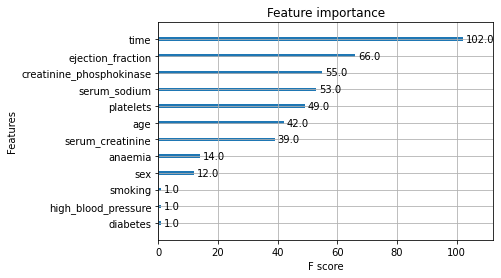

In [63]:
from xgboost import plot_importance
plot_importance(xg);

#### Gradient Boost

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(a,s) 

pred_gdbt = gbdt.predict(d) 
em(f,g)

accuracy score :  0.8166666666666667
precision score :  0.875
recall score :  0.6086956521739131
confusion matrix : 
 [[35  2]
 [ 9 14]]


### Saving the Best Model

In [69]:
import joblib 
joblib.dump(xg, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(d)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])